In [9]:
import pandas as pd
import graphviz


In [86]:
xls = pd.ExcelFile('TNBC_Common_Metadata_2022.09.07.xlsx')
subjects = pd.read_excel(xls, "Application profile")
subjects

,shapeID,Unnamed: 1,propertyID,propertyLabel,valueNodeType,valueDataType,valueConstraint,valueConstraintLabel,valueShape
0,studySite,NaN,rdf:type,is a,iri,NaN,obo:NCIT_C80403,Study Site,NaN
1,studySite,NaN,rdfs:label,has label,literal,xsd:string,"COH,LSU,Cam,KCL",NaN,NaN
2,subject,NaN,rdf:type,is a,iri,NaN,obo:NCIT_C16960,Patient,NaN
3,subject,NaN,dcterms:identifier,has identifier,literal,xsd:string,NaN,NaN,NaN
4,subject,NaN,sio:SIO_000066,has provider,iri,NaN,NaN,NaN,studySite
5,subject,NaN,ccf:has_race,has race,literal,xsd:string,"Black,White,Asian,Hispanic",NaN,NaN
6,subject,NaN,obo:OBI_0100051,Specimen,iri,NaN,NaN,NaN,subjectArchivedSpecimen
7,er,NaN,rdf:type,is a,iri,NaN,obo:NCIT_C25209,Measurement,NaN
8,subjectArchivedSpecimen,NaN,obo:TXPO_0001873,has finding,iri,NaN,NaN,NaN,er
9,er,NaN,rdfs:domain,has domain,iri,NaN,obo:NCIT_C16150,Estrogen Receptor Status,NaN


In [20]:
symbol = dict()
symbol["class"] = "oval"
symbol["datatype"] = "octagon"
symbol["literal"] = "rectangle"
symbol["uri"]="diamond"
symbol["bnode"]='point'
symbol["oneof"]='record'
schema = graphviz.Digraph('TNBC_Common_Metadata_2022.09.07.gv')

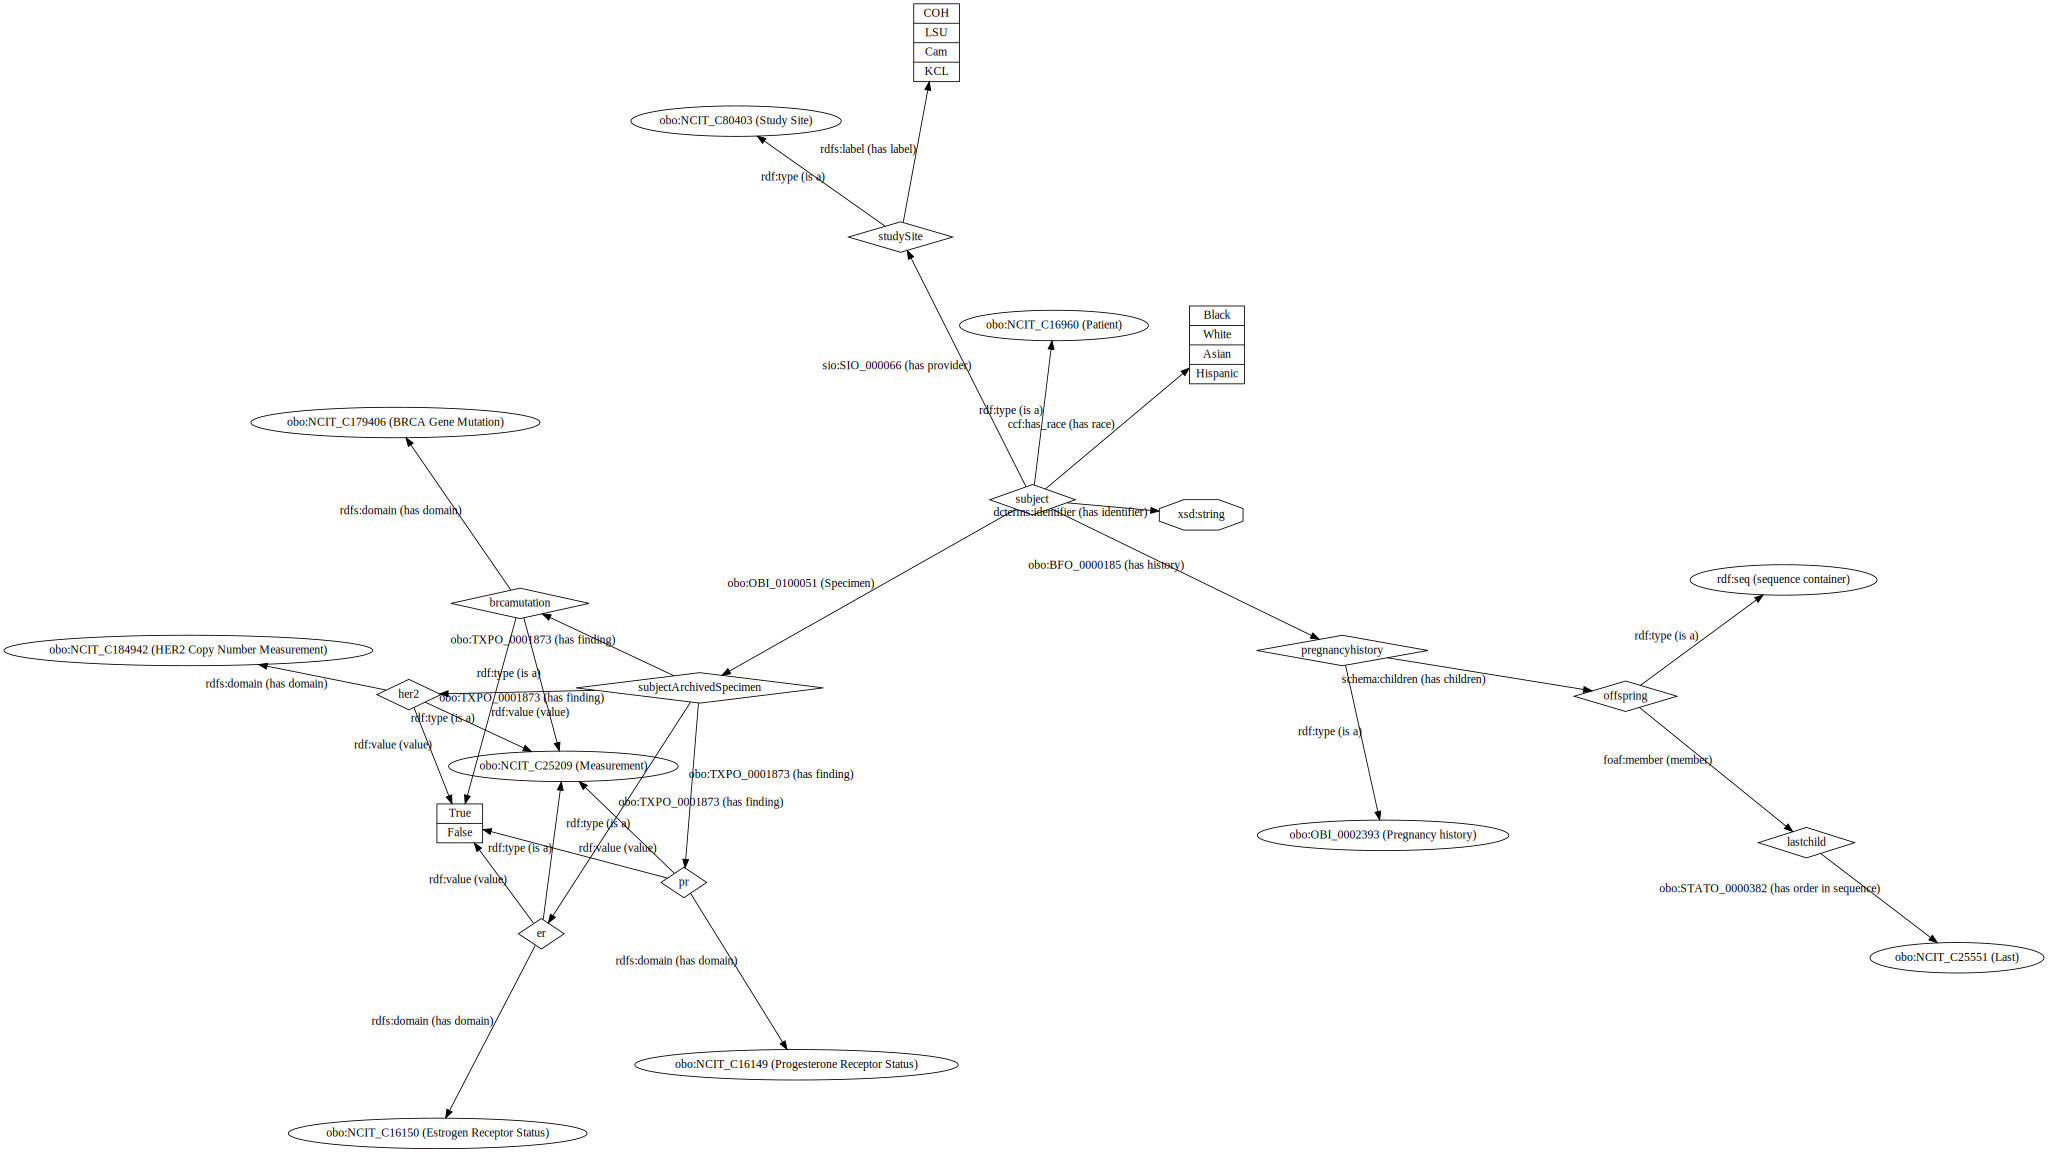

In [91]:
xls = pd.ExcelFile('TNBC_Common_Metadata_2022.09.07.xlsx')
subjects = pd.read_excel(xls, "Application profile")

schema = graphviz.Digraph()
#schema.graph_attr['layout'] = 'dot' # hierarchical or layered drawings of directed graphs
#schema.graph_attr['layout'] = 'neato' # “spring model” layouts.
#schema.graph_attr['layout'] = 'fdp' # stands for Force-Directed Placement.
schema.graph_attr['layout'] = 'sfdp' # stands for Scalable Force-Directed Placement.
#schema.graph_attr['layout'] = 'osage' # draws clustered graphs.
#schema.graph_attr['layout'] = 'patchwork' # draws map of clustered graph using a squarified treemap layout..
shapeIDs=[]
classes = []
datatypes = []

for index, row in subjects.iterrows():
    if row["shapeID"] not in shapeIDs:
        schema.attr('node', shape=symbol["uri"])
        schema.node(row['shapeID'], shape=symbol["uri"])
    if row["valueNodeType"] == "iri":
        if not pd.isnull(row["valueShape"]):
            schema.edge(row["shapeID"], row['valueShape'], label=row["propertyID"]+" ("+row["propertyLabel"]+")")
        if not pd.isnull(row["valueConstraint"]):
            values = row["valueConstraint"].split(",")
            valuesLabel = row["valueConstraintLabel"].split(",")
            schema.attr('node', shape=symbol["oneof"])
            concatvalues = []
            for i, term in enumerate(values):
                if term.split(":")[1] not in classes:
                    classes.append(term.split(":")[1])
                concatvalues.append(term+" ("+valuesLabel[i]+")")
            schema.node("".join(valuesLabel), shape=symbol['oneOf'], label="{ "+"|".join(concatvalues)+" }")
            if row["valueConstraint"].split(":")[1] not in classes:
                classes.append(row["valueConstraint"].split(":")[1])
                schema.attr('node', shape=symbol["uri"])
                schema.node(row["valueConstraint"].split(":")[1], shape=symbol['class'], label=row["valueConstraint"] + " ("+row["valueConstraintLabel"]+")")
            schema.edge(row["shapeID"], row["valueConstraint"].split(":")[1] , label=row["propertyID"]+" ("+row["propertyLabel"]+")")
    if row["valueNodeType"] == "literal":
        if not pd.isnull(row["valueConstraint"]):
            values = row["valueConstraint"].split(",")
            valueLabels = row["valueConstraint"].split(",")
            if len(values)>1:
                schema.node("".join(values), label="{"+"|".join(values)+"}")
                schema.edge(row["shapeID"], "".join(values), label=row["propertyID"]+" ("+row["propertyLabel"]+")")
        elif not pd.isnull(row["valueDataType"]):
            if row["valueDataType"] not in datatypes:
                datatypes.append(row["valueDataType"])
                schema.attr('node', shape=symbol["datatype"])
                schema.node(row["valueDataType"].replace(":", "_"), label=row["valueDataType"])
                schema.edge(row["shapeID"], row["valueDataType"].replace(":", "_"), label=row["propertyID"]+" ("+row["propertyLabel"]+")")
schema

In [67]:
def add2graphviz(command=None, arg1=None, arg2=None, shape=None, label=None):
    if command == "attr":
        localviz.attr(arg1, shape=shape)
        schema.attr(arg1, shape=shape)
    if command == "node":
        localviz.node(arg1,label=label)
        schema.node(arg1,label=label)
    if command == "edge":
        localviz.edge(arg1, arg2, label=label)
        schema.edge(arg1, arg2, label=label)

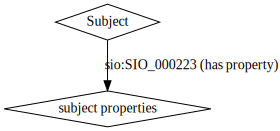

In [14]:
localviz = graphviz.Digraph()
# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
# nodes
add2graphviz(command='node', arg1='subject', label="Subject")
add2graphviz(command='node', arg1='subjectProperties', label="subject properties")

#edges
add2graphviz(command='edge', arg1='subject', arg2='subjectProperties', label='sio:SIO_000223 (has property)')
localviz